[View in Colaboratory](https://colab.research.google.com/github/MicroprocessorX069/Mouse-Cursor-Detection/blob/master/Task_3_Cursor_Detection.ipynb)

Using Open cv2 function matchTemplate()

In [0]:

def pad_image(image,pad_x,pad_y):
  image_x=len(image[0])
  image_y=len(image)
  padded_image=np.zeros((image_y+pad_y,image_x+pad_x))
  padded_image_x=len(padded_image[0])
  padded_image_y=len(padded_image)
  
  for i in range(image_y):
    for j in range(image_x):
      padded_image[i,j]=image[i,j]
  return(padded_image)

import scipy.stats as st
def gkern(kernlen=21, nsig=3):
    interval = (2*nsig+1.)/(kernlen)  
    x = np.linspace(-nsig-interval/2., nsig+interval/2., kernlen+1)
    kern1d = np.diff(st.norm.cdf(x))
    kernel_raw = np.sqrt(np.outer(kern1d, kern1d))
    kernel = kernel_raw/kernel_raw.sum()
    return kernel
#plt.imshow(gkern(21,10))

import numpy as np
def gaussian_blur(input_image,sig):
    kernel=gkern(3,sig)
    input_image=np.array(input_image)
    padded_input=np.pad(input_image,(int((len(kernel))/2),int((len(kernel))/2)),'constant')
    padded_input=np.array(padded_input)
    new_image=np.zeros((len(input_image),len(input_image[0])))
    for input_x in range(int((len(kernel))/2),(len(padded_input)-int((len(kernel))/2))):
      for input_y in range(int((len(kernel))/2),(len(padded_input[0])-int((len(kernel))/2))):
          #padded_input[input_x,input_y]=0
          '''for kernel_x in range(len(kernel)):
             for kernel_y in range(len(kernel[0])):
                  padded_input[input_x,input_y]=padded_input[input_x,input_y]+padded_input[input_x+kernel_x-int((len(kernel))/2), input_y+kernel_y-int((len(kernel))/2)]*kernel[kernel_x,kernel_y]
                  new_image[input_x-int((len(kernel))/2),input_y-int((len(kernel))/2)]=padded_input[input_x,input_y]
                  '''
          padded_input_slice=padded_input[input_x-int((len(kernel))/2):input_x+int((len(kernel))/2)+1,input_y-int((len(kernel[0]))/2):input_y+int((len(kernel[0]))/2)+1]
          product_mat=np.multiply(padded_input_slice,kernel)
          new_image[input_x-int((len(kernel))/2),input_y-int((len(kernel))/2)]=np.sum(product_mat)       
                 #new_image[input_x-int((len(kernel))/2),input_y-int((len(kernel))/2)]=padded_input[input_x,input_y]+padded_input[input_x+kernel_x-int((len(kernel))/2), input_y+kernel_y-int((len(kernel))/2)]*kernel[kernel_x,kernel_y]
    return(new_image)   

def negative(input_image):
  #new_image2=np.zeros((len(input_image),len(input_image[0])))
  for x in range(len(input_image)):
     for y in range(len(input_image[0])):
         input_image[x,y]=255-input_image[x,y]
  return(input_image)

import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook, tnrange, tqdm


def linearSpatialFiltering(inputImg, template):
  
  temp_2=np.power(template,2)
  testImg=inputImg
  #testImg=np.array([[0,0,0,0],[0,0,10,0],[0,0,10,0],[0,0,0,0]])
  
  temp_w=len(template[0])
  temp_h=len(template)
  temp_x2=int(temp_w/2)
  temp_y2=int(temp_h/2)
  img_w=len(testImg[0])
  img_h=len(testImg)
    
  #Padding test image depending on the size of template
  paddedTestImg=pad_image(testImg,temp_w,temp_h)
    
  test_img_test=np.zeros(testImg.shape)
  test_img_test2=np.zeros(testImg.shape)
  for img_i in (range(img_h-temp_h)):
    for img_j in range(img_w-temp_w):
      
      paddedTestSlice=np.power(testImg[img_i:img_i+temp_h,img_j:img_j+temp_w],2)
      #sum=convolutionSimple(paddedTestSlice,temp_2)
      sum=np.sum(np.subtract(temp_2,paddedTestSlice))
      print(sum)
      test_img_test[img_i,img_j]=sum
  
  min_x,min_y=np.unravel_index(test_img_test.argmin(),test_img_test.shape)
  print(min_x,min_y)
  result=testImg[min_x-20:min_x+20,min_y-20:min_y+20]
  return(test_img_test)

def flip(matrix):
  new_matrix=np.zeros((matrix.shape))
  matrix=np.array(matrix)
  l=len(matrix)
  for i in range(l):
    for j in range(l):
      new_matrix[i,j]=matrix[l-i-1,l-j-1]
  return(new_matrix)

import numpy as np
def convolution(input_image,kernel):
    
    input_image=np.array(input_image)
    padded_input=np.pad(input_image,(int((len(kernel))/2),int((len(kernel))/2)),'constant')
    padded_input=np.array(padded_input)
    kernel=flip(np.array(kernel))
    new_image=np.zeros((len(input_image),len(input_image[0])))
    for input_x in range(int((len(kernel))/2),(len(padded_input)-int((len(kernel))/2))):
      for input_y in range(int((len(kernel))/2),(len(padded_input[0])-int((len(kernel))/2))):
          #padded_input[input_x,input_y]=0
          padded_input_slice=padded_input[input_x-int((len(kernel))/2):input_x+int((len(kernel))/2)+1,input_y-int((len(kernel[0]))/2):input_y+int((len(kernel[0]))/2)+1]
          product_mat=np.multiply(padded_input_slice,kernel)
          new_image[input_x-int((len(kernel))/2),input_y-int((len(kernel))/2)]=np.sum(product_mat)       
                 #new_image[input_x-int((len(kernel))/2),input_y-int((len(kernel))/2)]=padded_input[input_x,input_y]+padded_input[input_x+kernel_x-int((len(kernel))/2), input_y+kernel_y-int((len(kernel))/2)]*kernel[kernel_x,kernel_y]
    return(new_image)  
  
def convolutionSimple(mat1,mat2):
  #print(np.sum(np.multiply(mat1,mat2)))
  return(np.sum(np.multiply(mat1,mat2)))

Template matching using sum of square differences.

In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
input_image=np.array(cv2.imread("pos_12.jpg",cv2.IMREAD_GRAYSCALE)) #make sure the path to the image is in String format
input_image=negative(input_image)
#input_image=input_image.astype(np.float32)
template= negative(np.array(cv2.imread("template.png",cv2.IMREAD_GRAYSCALE),dtype='int8'))
#template=template.astype(np.float32)

gaussian_blur_img=cv2.GaussianBlur(input_image,(3,3),0)
laplacian_kernel=[[0	,1,	0],[1,	-4	,1],[0,	1,	0]]
laplacian_transform_img=convolution(gaussian_blur_img,laplacian_kernel)
laplacian_transform_template=convolution(template,laplacian_kernel)
laplacian_transform_img=laplacian_transform_img.astype(np.float32)
laplacian_transform_template=laplacian_transform_template.astype(np.float32)

outputImg=linearSpatialFiltering(laplacian_transform_img,laplacian_transform_template)  
plt.imshow(outputImg)

# Direct Functions

180 658


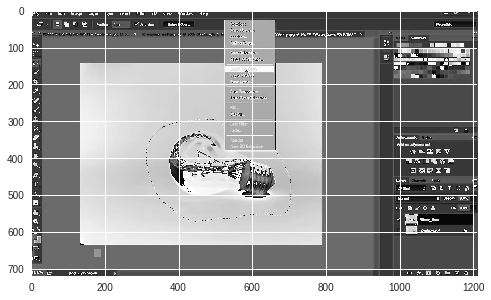

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

input_image=np.array(cv2.imread("pos_12.jpg",cv2.IMREAD_GRAYSCALE),dtype='int8') #make sure the path to the image is in String format
#input_image=negative(input_image)
input_image=input_image.astype(np.float32)
template= negative(np.array(cv2.imread("template.png",cv2.IMREAD_GRAYSCALE)))
template=template.astype(np.float32)
gaussian_blurred=cv2.GaussianBlur(input_image,(3,3),0)

laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])

laplacian_transformed=convolution(gaussian_blurred,laplacian)
laplacian_transform_template=convolution(template,laplacian)

laplacian_transformed=laplacian_transformed.astype(np.float32)
laplacian_transform_template=laplacian_transform_template.astype(np.float32)

result1 = cv2.matchTemplate(laplacian_transformed,laplacian_transform_template,cv2.TM_CCOEFF_NORMED)
y1,x1 = np.unravel_index(result1.argmax(), result1.shape)
input_image_temp=input_image
input_image_temp[x1-10:x1+10,y1-10:y1+10]=0
plt.imshow(input_image_temp)
print(y1,x1)




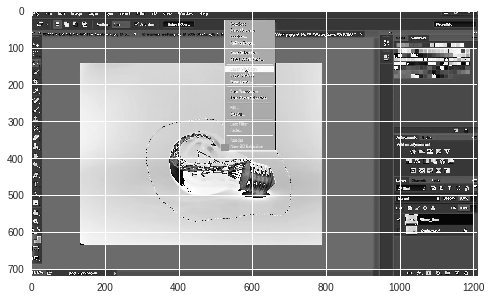

In [9]:
plt.imshow(input_image)